In [1]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import string
import random
import nltk
import numpy as num
from nltk.stem import WordNetLemmatizer # It has the ability to lemmatize.
import tensorflow as tensorF # A multidimensional array of elements is represented by this symbol.
from tensorflow.keras import Sequential # Sequential groups a linear stack of layers into a tf.keras.Model
from tensorflow.keras.layers import Dense, Dropout

nltk.download("punkt")# required package for tokenization
nltk.download("wordnet")# word database

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import glob
from matplotlib import pyplot as plt
from deepface import DeepFace
import cv2
import speech_recognition as sr

In [3]:
def loadprofile():
  return [cv2.imread(file) for file in glob.glob("C:/Users/ASUS/Capstone/images/*g")]

In [4]:
img = loadprofile()
len(img)

2

In [5]:
data = {"intents": [

             {"tag": "apa",
              "patterns": ["Apakah yang dimaksud Stunting?","Stunting itu apa?","Apa itu Stunting?","stunting itu apa?","stunting adalah?"],
              "responses": ["Stunting adalah kondisi gagal tumbuh pada anak berusia dibawah lima tahun (balita) akibat kekurangan asupan gizi kronis dan infeksi berulang terutama pada periode 1.000 Hari Pertama Kehidupan (HPK), yaitu dari janin hingga anak berusia 23 bulan. Stunting ditentukan oleh indeks antropometri yang menggunakan data panjang badan berdasarkan umur (PB/U) untuk anak usia dibawah 2 tahun dan menggunakan data tinggi badan berdasarkan umur (TB/U) untuk anak usia 2 tahun ke atas. Dalam laporan Riskesdas, kondisi stunting merupakan gabungan antara anak dengan status gizi pendek dan sangat pendek."]
             },
              {"tag": "mendeteksi",
              "patterns": [ "Bagaimana cara mendeteksi stunting?","Bagaimana tau stunting?","Cara mendeteksi?"],
              "responses": ["Pertumbuhan dan perkembangan merupakan hal yang seharusnya selalu dipantau pada setiap kunjungan ke dokter. Pemantauan pertumbuhan anak biasanya dilakukan dengan memplot berat badan dan tinggi badan ke dalam suatu kurva pertumbuhan. Seorang anak dikatakan pendek  jika tinggi badan atau panjang badan menurut usia lebih dari dua standar deviasi di bawah median kurve standar pertumbuhan anak WHO."],
             },
              {"tag": "ciri",
              "patterns": [ "Ciri Stunting?", "Ciri ciri anak stunting?", " Ciri?","Ciri ciri"],
              "responses": ["Keterlambatan pertumbuhan, Performa buruk pada tes perhatian dan memori belajar, Tanda pubertas terlambatAnak menjadi pendiam, sulit melakukan eye contact saat usia 8-10 tahun, Wajah tampak lebih muda dari usianya, Mudah mengalami penyakit infeksi"]
             },
             {"tag": "diatasi",
              "patterns": ["Apakah stunting masih bisa diatasi?","bisa diatasi?","cara mengatasi?"],
              "responses": ["Sayangnya, stunting adalah kondisi gangguan pertumbuhan yang tidak bisa dikembalikan seperti semula. Maksudnya, ketika seorang anak sudah stunting atau pendek sejak ia masih balita, maka pertumbuhannya akan terus lambat hingga ia dewasa. Saat puber, ia tidak dapat mencapai pertumbuhan maksimal akibat sudah terkena stunting di waktu kecil. Meskipun, Walaupun diberikan makanan yang kaya akan gizi, namun tetap saja pertumbuhannya tidak dapat maksimal."]
             },
             {"tag": "penyakit",
              "patterns": ["Apakah stunting itu penyakit?","stunting penyakit?","penyakit?","itu penyakit?"],
              "responses": ["Stunting bukan penyakit, tapi kondisi gagal tumbuh karena kurangnya asupan makanan dan terjadinya infeksi berulang dalam jangka waktu tertentu (kronis) yang terjadi pada periode emas atau 1.000 HPK seorang anak yaitu  sejak berada dalam kandungan hingga usia 2 tahun."]
             },
             {"tag": "dampak",
              "patterns": ["Apa dampak?","dampak?","dampaknya?"],
              "responses": ["Selain gangguan pertumbuhan yang diindikasikan oleh stunting, biasanya anak juga dapat mengalami gangguan perkembangan akibat masalah gizi kronis, baik gangguan pada perkembangan kognitif, motorik, ataupun sistem kekebalan tubuh. Gangguan perkembangan inilah yang kemudian dapat menyebabkan anak mengalami kesulitan belajar atau mudah terserang penyakit. Kondisi kurang gizi kronis yang tidak dicegah atau terlambat dikoreksi dapat meningkatkan resiko terkena penyakit tidak menular (PTM) di usia lebih lanjut (seperti diabetes, penyakit jantung, kanker, stroke, dan lain-lain) pada level individu dan menurunkan angka produktivitas sumber daya manusia pada level populasi."]
             },
             {"tag": "cegah",
              "patterns": ["Apa cagah?","dapat dicegah?","cegah?"],
              "responses": ["Stunting dapat dicegah atau dikoreksi jika dilakukan sebelum atau selama periode emas. Karenanya berbagai intervensi penting dilakukan sejak dini, mulai dari mempersiapkan kondisi gizi dan kesehatan calon ibu hingga memastikan kesehatan yang baik dan gizi yang cukup terutama pada 1000 Hari Pertama Kehidupan, yaitu sejak anak berada dalam kandungan hingga usia 2 tahun."]
             }

]}

In [6]:
lm = WordNetLemmatizer() #for getting words
# lists
ourClasses = []
newWords = []
documentX = []
documentY = []
# Each intent is tokenized into words and the patterns and their associated tags are added to their respective lists.
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        ournewTkns = nltk.word_tokenize(pattern)# tokenize the patterns
        newWords.extend(ournewTkns)# extends the tokens
        documentX.append(pattern)
        documentY.append(intent["tag"])


    if intent["tag"] not in ourClasses:# add unexisting tags to their respective classes
        ourClasses.append(intent["tag"])

newWords = [lm.lemmatize(word.lower()) for word in newWords if word not in string.punctuation] # set words to lowercase if not in punctuation
newWords = sorted(set(newWords))# sorting words
ourClasses = sorted(set(ourClasses))# sorting classes

In [7]:
trainingData = [] # training list array
outEmpty = [0] * len(ourClasses)
# bow model
for idx, doc in enumerate(documentX):
    bagOfwords = []
    text = lm.lemmatize(doc.lower())
    for word in newWords:
        bagOfwords.append(1) if word in text else bagOfwords.append(0)

    outputRow = list(outEmpty)
    outputRow[ourClasses.index(documentY[idx])] = 1
    trainingData.append([bagOfwords, outputRow])

random.shuffle(trainingData)
trainingData = num.array(trainingData, dtype=object)# coverting our data into an array afterv shuffling

x = num.array(list(trainingData[:, 0]))# first trainig phase
y = num.array(list(trainingData[:, 1]))# second training phase

In [8]:
iShape = (len(x[0]),)
oShape = len(y[0])
# parameter definition
ourNewModel = Sequential()
# In the case of a simple stack of layers, a Sequential model is appropriate

# Dense function adds an output layer
ourNewModel.add(Dense(128, input_shape=iShape, activation="relu"))
# The activation function in a neural network is in charge of converting the node's summed weighted input into activation of the node or output for the input in question
ourNewModel.add(Dropout(0.5))
# Dropout is used to enhance visual perception of input neurons
ourNewModel.add(Dense(64, activation="relu"))
ourNewModel.add(Dropout(0.3))
ourNewModel.add(Dense(oShape, activation = "softmax"))
# below is a callable that returns the value to be used with no arguments
md = tensorF.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
# Below line improves the numerical stability and pushes the computation of the probability distribution into the categorical crossentropy loss function.
ourNewModel.compile(loss='categorical_crossentropy',
              optimizer=md,
              metrics=["accuracy"])
# Output the model in summary
print(ourNewModel.summary())
# Whilst training your Nural Network, you have the option of making the output verbose or simple.
ourNewModel.fit(x, y, epochs=200, verbose=1)
# By epochs, we mean the number of times you repeat a training set.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 11,911
Trainable params: 11,911
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
1/1 [==============================

1/1 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 153/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 154/200
1/1 [==============================] - 0s 15ms/step - loss: 1.9452e-04 - accuracy: 1.0000
Epoch 155/200
1/1 [==============================] - 0s 13ms/step - loss: 6.2150e-04 - accuracy: 1.0000
Epoch 156/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 157/200
1/1 [==============================] - 0s 13ms/step - loss: 4.8354e-04 - accuracy: 1.0000
Epoch 158/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 159/200
1/1 [==============================] - 0s 14ms/step - loss: 3.0715e-04 - accuracy: 1.0000
Epoch 160/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0901 - accuracy: 0.9600
Epoch 161/200
1/1 [==============================] - 0s 19ms/step - loss: 6.0206e-04 - accuracy: 1

In [9]:
def ourText(text):
  newtkns = nltk.word_tokenize(text)
  newtkns = [lm.lemmatize(word) for word in newtkns]
  return newtkns

def wordBag(text, vocab):
  newtkns = ourText(text)
  bagOwords = [0] * len(vocab)
  for w in newtkns:
    for idx, word in enumerate(vocab):
      if word == w:
        bagOwords[idx] = 1
  return num.array(bagOwords)

def Pclass(text, vocab, labels):
  bagOwords = wordBag(text, vocab)
  ourResult = ourNewModel.predict(num.array([bagOwords]))[0]
  newThresh = 0.2
  yp = [[idx, res] for idx, res in enumerate(ourResult) if res > newThresh]

  yp.sort(key=lambda x: x[1], reverse=True)
  newList = []
  for r in yp:
    newList.append(labels[r[0]])
  return newList

def getRes(firstlist, fJson):
  tag = firstlist[0]
  listOfIntents = fJson["intents"]
  for i in listOfIntents:
    if i["tag"] == tag:
      ourResult = random.choice(i["responses"])
      break
  return ourResult

1/1 [==============================] - 10s 10s/step


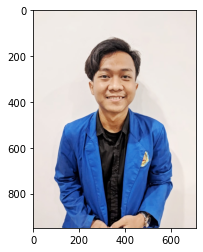

Gender :  Man
Selamat Datang Pak, ada yang bisa kami bantu?
Katakan sesuatu...
Suara Terdengar
Text: Apa itu standing
1/1 [==============================] - 0s 298ms/step
Stunting adalah kondisi gagal tumbuh pada anak berusia dibawah lima tahun (balita) akibat kekurangan asupan gizi kronis dan infeksi berulang terutama pada periode 1.000 Hari Pertama Kehidupan (HPK), yaitu dari janin hingga anak berusia 23 bulan. Stunting ditentukan oleh indeks antropometri yang menggunakan data panjang badan berdasarkan umur (PB/U) untuk anak usia dibawah 2 tahun dan menggunakan data tinggi badan berdasarkan umur (TB/U) untuk anak usia 2 tahun ke atas. Dalam laporan Riskesdas, kondisi stunting merupakan gabungan antara anak dengan status gizi pendek dan sangat pendek.
Apakah Ada Pertanyaan lagi?
Katakan sesuatu...
Suara Terdengar
Text: ciri-cirinya adalah
1/1 [==============================] - 0s 43ms/step
Stunting adalah kondisi gagal tumbuh pada anak berusia dibawah lima tahun (balita) akibat kekura

UnknownValueError: 

In [18]:
result = DeepFace.analyze(img[0], actions = ['gender'])
plt.imshow(img[0][:,:,::-1])
plt.show()
print("Gender : ", result['gender'])
if result['gender'] == 'Man':
    print("Selamat Datang Pak, ada yang bisa kami bantu?")
elif result['gender'] == 'Woman':
    print("Selamat Datang Bu, ada yang bisa kami bantu?")
else:
    print("Selamat Datang, ada yang bisa kami bantu?")

#AUDIO    
r = sr.Recognizer()

while True:
    with sr.Microphone() as source:
        print("Katakan sesuatu...")
        audio_text = r.listen(source)
        print("Suara Terdengar")
    try:
        # using google speech recognition
        print("Text: "+r.recognize_google(audio_text, language="id-ID"))
    except:
         print("Maaf, saya tidak mengerti")
    pesan = r.recognize_google(audio_text, language="id-ID")
    if pesan == ('tidak'):
        print("Terima kasih sudah memakai VA Stunting kami")
        break
    intents = Pclass(pesan, newWords, ourClasses)
    ourResult = getRes(intents, data)
    print(ourResult)
    print("Apakah Ada Pertanyaan lagi?")

1/1 [==============================] - 12s 12s/step


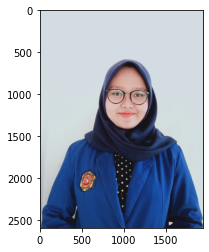

Gender :  Woman
Selamat Datang Bu, ada yang bisa kami bantu?
stuting itu apa?
1/1 [==============================] - 0s 241ms/step
Stunting adalah kondisi gagal tumbuh pada anak berusia dibawah lima tahun (balita) akibat kekurangan asupan gizi kronis dan infeksi berulang terutama pada periode 1.000 Hari Pertama Kehidupan (HPK), yaitu dari janin hingga anak berusia 23 bulan. Stunting ditentukan oleh indeks antropometri yang menggunakan data panjang badan berdasarkan umur (PB/U) untuk anak usia dibawah 2 tahun dan menggunakan data tinggi badan berdasarkan umur (TB/U) untuk anak usia 2 tahun ke atas. Dalam laporan Riskesdas, kondisi stunting merupakan gabungan antara anak dengan status gizi pendek dan sangat pendek.
Apakah Ada Pertanyaan lagi?
stunting termasuk penyakit?
1/1 [==============================] - 0s 45ms/step
Stunting bukan penyakit, tapi kondisi gagal tumbuh karena kurangnya asupan makanan dan terjadinya infeksi berulang dalam jangka waktu tertentu (kronis) yang terjadi pada

In [17]:
result = DeepFace.analyze(img[1], actions = ['gender'])
plt.imshow(img[1][:,:,::-1])
plt.show()
print("Gender : ", result['gender'])
if result['gender'] == 'Man':
    print("Selamat Datang Pak, ada yang bisa kami bantu?")
elif result['gender'] == 'Woman':
    print("Selamat Datang Bu, ada yang bisa kami bantu?")
else:
    print("Selamat Datang, ada yang bisa kami bantu?")

while True:
    newMessage = input("")
    if newMessage == ('Tidak'):
        print("Terima kasih sudah memakai VA Stunting kami")
        break
    intents = Pclass(newMessage, newWords, ourClasses)
    ourResult = getRes(intents, data)
    print(ourResult)
    print("Apakah Ada Pertanyaan lagi?")